## Ejercicio de Feedback: Clustering

# Introducción y planteamiento del problema

"**Ayuda Internacional**" es una ONG humanitaria internacional comprometida con la lucha contra la pobreza y con proporcionar a las personas de países subdesarrollados servicios básicos y ayuda en tiempos de desastres y calamidades naturales. Esta ONG ha logrado recaudar aproximadamente 10 millones de dólares. Este dinero debe ahora asignarse de manera estratégica y eficaz. Por lo tanto, para decidir la selección de los países que más necesitan ayuda, se deben tomar decisiones basadas en datos.

En consecuencia, resulta necesario **categorizar los países utilizando factores socioeconómicos y de salud** que determinen el desarrollo general de cada país. Basándose en estos grupos de países, definidos por sus condiciones, se distribuirán los fondos para brindar asistencia durante desastres y calamidades naturales. Este es un caso claro de clustering, donde se requiere crear grupos de países basados en las diferentes características presentes.

**Objetivo**:


*   Agrupar países en función de características numéricas socioeconómicas.
*   Determinar qué grupos de países requieren ayuda y en qué grado



## Nuestro conjunto de datos




* **country**: Nombre del país.
* **child_mort**: Muertes de niños menores de 5 años por cada 1000 nacidos vivos.
* **exports**: Exportaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **health**: Gasto total en salud per cápita, expresado como porcentaje del PIB per cápita.
* **imports**: Importaciones de bienes y servicios per cápita, expresadas como porcentaje del PIB per cápita.
* **Income**: Ingreso neto por persona.
* **Inflation**: Tasa de crecimiento anual del PIB total.
* **life_expec**: Número promedio de años que un recién nacido viviría si se mantienen los patrones actuales de mortalidad.
* **total_fer**: Número de hijos que nacerían por mujer si las tasas actuales de fertilidad por edad permanecen constantes.
* **gdpp**: PIB per cápita, calculado como el PIB total dividido entre la población total.




## 1 Importación de librerías

In [1]:
#Es posible que necesitéis estas librerías (y muchas más)
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
!pip install -U kaleido
import kaleido
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
# Clusterización
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly as py
!pip install scikit-learn



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\iraze\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\kaleido\_sync_server.py:11: UserWarning: 


This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.

  from .kaleido import Kaleido


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 12.4 MB/s  0:00:00

   ----------------------------------------  0/10 [simplejson]
   ----------------------------------------  0/10 [simplejson]
   ----------------------------------------  0/10 [simplejson]
   ----------------------------------------  0/10 [simplejson]
   ----------------------------------------  0/10 [simplejson]
   ----------------------------------------  0/10 [simplejson]
   ---- -----------------------------------  1/10 [pygments]
   ---- -----------------------------------  1/10 [pygments]
   ---- -----------------------------------  1/10 [pygments]
   ---- -----------------------------------  1/10 [pygments]
   ---- -----------------------------------  1/10 [pygments]
   ---- -----------------------------------  1/10 [pygments]
   ---- -----------------------------------  1/10 [pygments]
   ---- -----------------------------------  1/10 [


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\iraze\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


## 2 Análisis Exploratorio de los datos

Para comenzar, se llevó a cabo un procedimiento de Análisis Exploratorio de Datos (EDA) con el fin de obtener una comprensión inicial del conjunto de datos.

*   Primero, se determinó el tamaño del dataset y se mostraron algunos registros para familiarizarse con su estructura. A continuación, se generaron los estadísticos descriptivos (media, desviación, mínimos, máximos, etc.) para cada variable. Se constató que todas las características, a excepción del nombre del país, son numéricas y, por lo tanto, directamente utilizables en un algoritmo de agrupación.

*   Posteriormente, se analizó la distribución de cada una de las variables mediante la visualización de gráficas de densidad. Este análisis permitió evaluar la forma, el sesgo y la dispersión de los datos, identificando patrones importantes para las fases posteriores del proyecto.


In [2]:
# Importamos la librería pandas para trabajar con DataFrames.
import pandas as pd

# Leemos los datos del archivo CSV y los almacenamos en un DataFrame llamado 'df'.
df = pd.read_csv('Country-data.csv')

# Imprimimos las dimensiones del DataFrame (número de filas y columnas).
print(f'Dimensiones del DataFrame: {df.shape}')

# Mostramos las primeras 5 filas del DataFrame para una vista previa de los datos.
df.head()

Dimensiones del DataFrame: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Mostramos las estadísticas descriptivas de las variables numéricas del DataFrame.
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Dado que todas las características son númericas si que podríamos usarlas en un modelo de agrupación

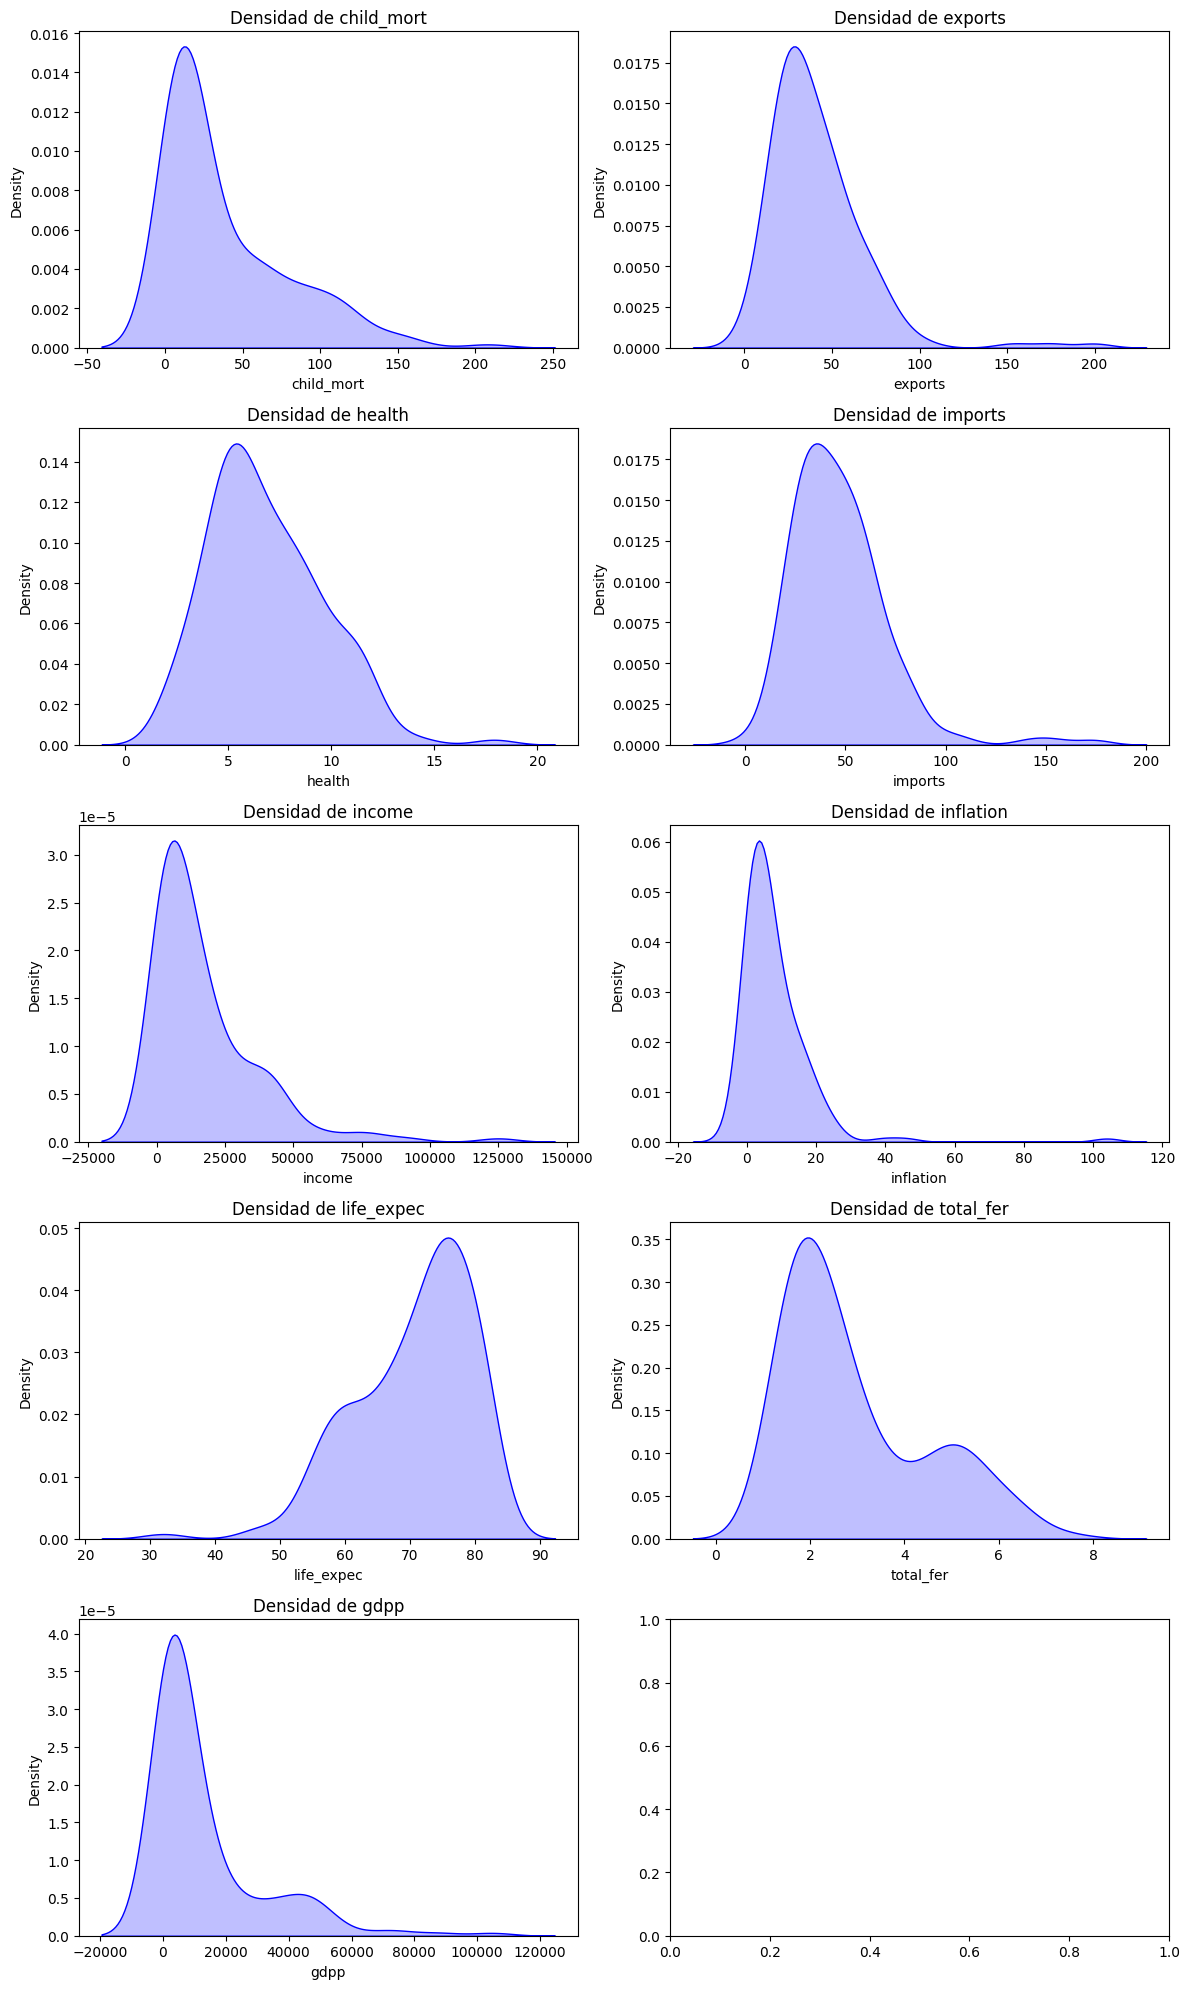

In [4]:

# Extraemos solo las columnas numéricas del DataFrame original.
num_vars = df.drop(columns=["country"])

# Definimos el número de columnas para las subgráficas (en este caso, 2).
num_cols = 2  # Usaremos dos columnas para mejor visualización

# Calculamos el número de filas necesarias para acomodar todos los gráficos.
num_rows = (len(num_vars.columns) + 1) // num_cols  # Filas necesarias

# Creamos la figura y los ejes para los subgráficos utilizando matplotlib.pyplot.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Convertimos la matriz de ejes en una lista plana para facilitar la iteración.
axes = axes.flatten()

# Generamos los gráficos de densidad para cada variable numérica.
for i, col in enumerate(num_vars.columns):
    sns.kdeplot(num_vars[col], ax=axes[i], fill=True, color="blue")  # Usamos seaborn para crear el gráfico de densidad.
    axes[i].set_title(f"Densidad de {col}")  # Establecemos el título del subgráfico.
    axes[i].set_xlabel(col)  # Establecemos la etiqueta del eje x.

# Ajustamos el espacio entre los subgráficos para evitar superposiciones.
plt.tight_layout()

# Mostramos la figura con todos los subgráficos.
plt.show()

Por lo general podemos observar que las variables se distribuyen de forma bastante normal, podemos observar también que en variables relacionados con temas de economía la mayoria de los paises son pobres pero hay algunos pocos valores atípicos de paises con mejor economía.
También podemos observar como dos maximos locales en la fertilidad lo que dependerá un poco de la cultura de la región de los paises.

Pero en general las variables se distribuyen según lo esperado.

## 3 Extracción de las características

A continuación, se realizaron una serie de transformaciones sobre los datos para construir las características finales que se utilizarán en el modelo de clustering.

*   **Análisis de Correlación**: Se generó una matriz de correlación para visualizar las relaciones lineales entre las variables. El análisis de esta matriz permitió identificar patrones importantes, como la fuerte correlación positiva entre `income` y `gdpp`, y la esperada correlación negativa entre `child_mort` y `life_expec`.

*   **Creación de Indicadores Agregados**: Para reducir la dimensionalidad y mejorar la interpretabilidad de los resultados, las nueve variables numéricas se agruparon en tres indicadores temáticos: **Salud** (4 variables), **Comercio** (2 variables) y **Finanzas** (3 variables). Cada indicador se construyó sumando los valores de sus variables correspondientes, previamente normalizadas por su media, para asegurar una contribución equitativa.

*   **Escalado Final de los Indicadores**: Una vez creados los tres indicadores, se analizó su distribución para decidir el método de escalado más adecuado. Dado que K-Means es sensible a la escala de las variables, era crucial asegurar que los tres indicadores tuvieran un rango comparable. Tras visualizar sus distribuciones, se procedió a aplicar el método de escalado seleccionado para preparar los datos para el clustering.






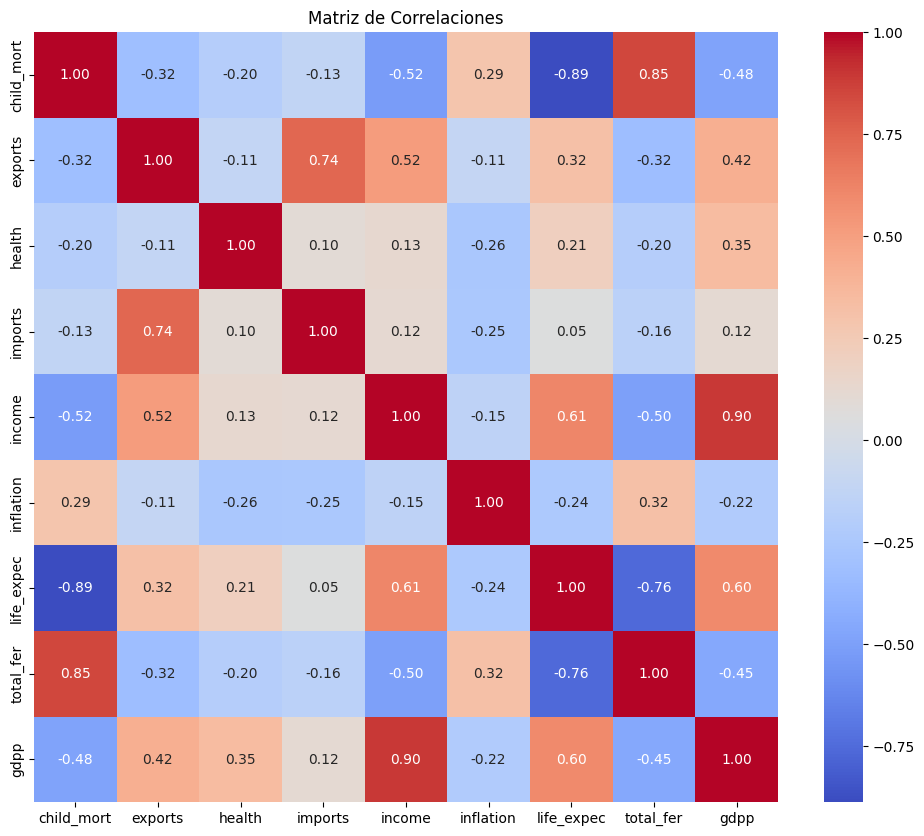

In [5]:
# Calculamos la matriz de correlaciones, excluyendo la columna 'country'.
correlation_matrix = df.drop(columns=["country"]).corr()

# Creamos una figura para el mapa de calor y ajustamos su tamaño.
plt.figure(figsize=(12, 10))

# Generamos el mapa de calor utilizando seaborn, mostrando los valores de correlación.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadimos un título al mapa de calor.
plt.title('Matriz de Correlaciones')

# Mostramos el mapa de calor generado.
plt.show()

Podemos observar que la muerte de niños esta relacionado negativamente con la esperanza de vida como es lógico y también relacionado positivamente con la fertilidad, pues si mas nacen mas mueren.

Las exportaciones están relacionadas con las importaciones, pues por lo general cuanto mas de uno hay, también hay mas de la otra.

El ingreso por persona está muy relacionado con el PIB como es de esperar.

También la esperanza de vida y la fertilidad estan negativamente relacionadas.

In [6]:
# Creamos un nuevo DataFrame 'df_i' con el mismo índice que 'df' para almacenar los indicadores.
df_i = pd.DataFrame(index=df.index)

# Definimos las variables que agruparemos en cada indicador.
salud_vars = ["child_mort", "health", "life_expec", "total_fer"]  # Variables relacionadas con la salud.
comercio_vars = ["exports", "imports"]  # Variables relacionadas con el comercio.
finanzas_vars = ["income", "inflation", "gdpp"]  # Variables relacionadas con las finanzas.

# Calculamos los indicadores dividiendo cada variable por su media y sumando los resultados.
df_i["Salud"] = df[salud_vars].div(df[salud_vars].mean()).sum(axis=1)  # Creamos el indicador 'Salud'.
df_i["Comercio"] = df[comercio_vars].div(df[comercio_vars].mean()).sum(axis=1)  # Creamos el indicador 'Comercio'.
df_i["Finanzas"] = df[finanzas_vars].div(df[finanzas_vars].mean()).sum(axis=1)  # Creamos el indicador 'Finanzas'.


C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\2132480528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_i["Salud"])


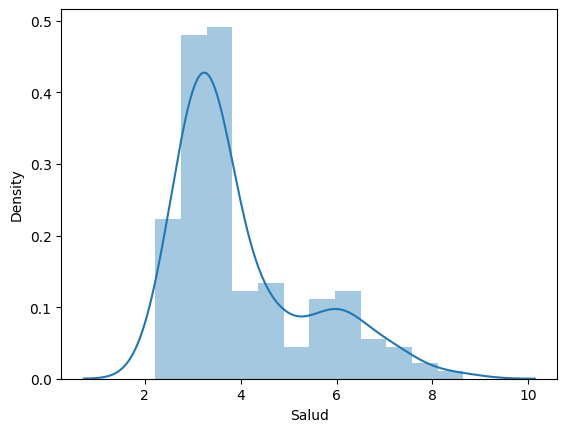

C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\2132480528.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_i["Comercio"])


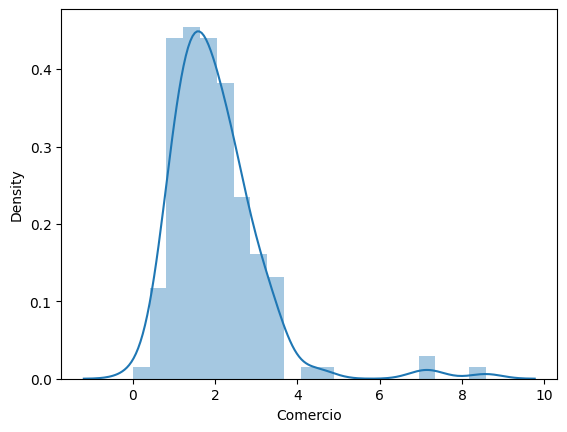

C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\2132480528.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_i["Finanzas"])


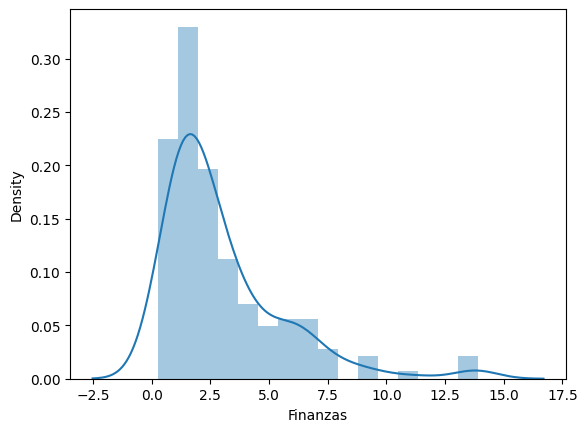

In [7]:


# Visualizamos la distribución del indicador "Salud" mediante un histograma.
sns.distplot(df_i["Salud"])
plt.show()

# Visualizamos la distribución del indicador "Comercio" mediante un histograma.
sns.distplot(df_i["Comercio"])
plt.show()

# Visualizamos la distribución del indicador "Finanzas" mediante un histograma.
sns.distplot(df_i["Finanzas"])
plt.show()

Observando la densidad de los indicadores, creo que lo mejor es que apliquemos normalización a salud  y una estandarizacion a comercio y finanzas pues hay algunos valores atipicos

In [8]:
# Inicializamos los escaladores para la normalización y la estandarización.
scaler_minmax = MinMaxScaler() # Inicializamos el escalador MinMaxScaler para la normalización.
scaler_std = StandardScaler() # Inicializamos el escalador StandardScaler para la estandarización.


# Aplicamos la estandarización a la columna "Salud".
df_i[["Salud"]] = scaler_std.fit_transform(df_i[["Salud"]]) # Ajustamos y transformamos la columna "Salud" usando StandardScaler.

# Aplicamos la normalización a las columnas "Comercio", "Finanzas" y "Salud".
df_i[["Comercio","Finanzas","Salud"]] = scaler_minmax.fit_transform(df_i[["Comercio","Finanzas","Salud"]]) # Ajustamos y transformamos las columnas usando MinMaxScaler.


In [ ]:
df_i

,Salud,Comercio,Finanzas
0,0.625740,0.139614,0.079820
1,0.127451,0.199901,0.088756
2,0.182485,0.186622,0.212808
3,0.661381,0.283058,0.236946
4,0.116409,0.275189,0.145043
...,...,...,...
162,0.217274,0.262886,0.035009
163,0.133337,0.124193,0.559740
164,0.170070,0.403386,0.121436
165,0.397451,0.170248,0.229632


C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\2514636609.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_i["Salud"])


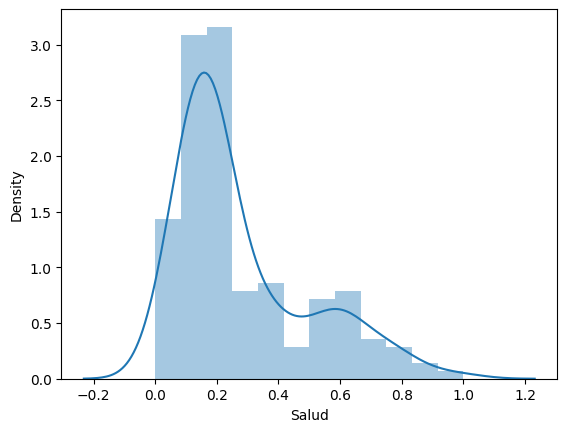

C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\2514636609.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_i["Comercio"])


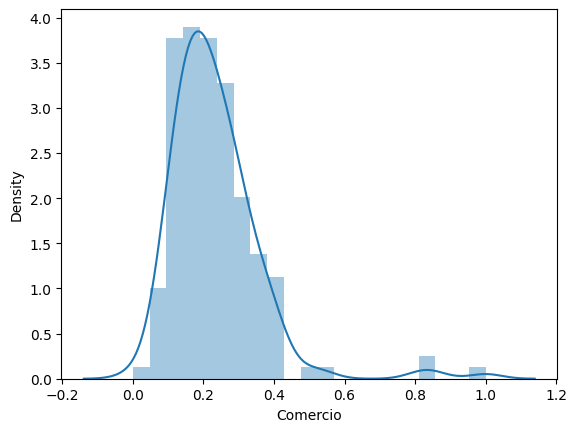

C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\2514636609.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_i["Finanzas"])


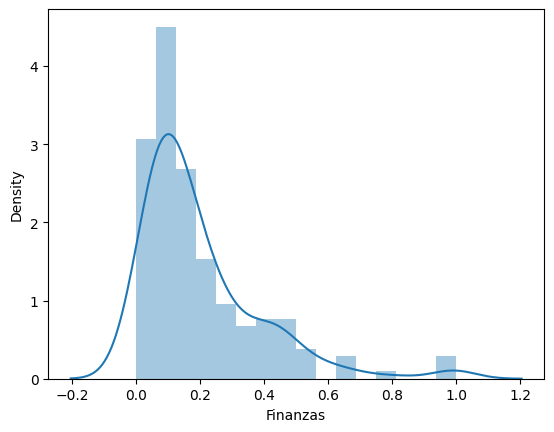

In [9]:
# Visualizamos la distribución del indicador "Salud" después de la normalización.
sns.distplot(df_i["Salud"])
plt.show()

# Visualizamos la distribución del indicador "Comercio" después de la normalización.
sns.distplot(df_i["Comercio"])
plt.show()

# Visualizamos la distribución del indicador "Finanzas" después de la normalización.
sns.distplot(df_i["Finanzas"])
plt.show()

## 4 Entrenamiento y evaluación del modelo



Una vez preparadas y escaladas las características, se procedió a la fase de modelado para agrupar los países.

*   **Selección del Algoritmo de Clustering**: Tras analizar la naturaleza del problema y las características de los datos, se seleccionó el algoritmo **K-Means**. Esta elección se justifica por su eficiencia y su capacidad para crear clústeres esféricos y bien definidos, lo cual es ideal para una segmentación clara. A diferencia de algoritmos como DBSCAN, K-Means no trata los valores atípicos (que en este caso representan países con economías extremas y son relevantes para el análisis) como ruido, sino que los asigna al clúster más cercano.

*   **Determinación del Número Óptimo de Clústeres (K)**: El hiperparámetro principal de K-Means es el número de clústeres (K). Para encontrar el valor óptimo, se realizó un análisis exhaustivo utilizando tres técnicas complementarias:
    1.  **Método del Codo**: Se analizó la inercia (suma de distancias al cuadrado) para un rango de valores de K, buscando el "codo" o punto de inflexión.
    2.  **Puntuación de Silueta**: Se calculó el coeficiente de silueta promedio para diferentes valores de K, identificando el K que maximiza esta métrica.
    3.  **Gap Statistic**: Se comparó la dispersión intra-clúster con una distribución de referencia nula para encontrar el K que maximiza la "brecha".
    
    La convergencia de estos tres métodos proporcionó una fuerte evidencia para seleccionar el número final de clústeres.

*   **Evaluación y Visualización de la Agrupación**: Finalmente, se evaluó la calidad de la agrupación resultante mediante la puntuación de silueta del modelo final. Además, se generaron visualizaciones en 2D y 3D utilizando `matplotlib` y `plotly` para inspeccionar visualmente la separación y cohesión de los clústeres formados en el espacio de características de los tres indicadores.


Como los pocos outliers que tenemos en el data set son relevantes para la agrupación, entonces nos conviene usar k-means en vez de DBScans, ya que no tenemos que molestarnos especificamente en agrupar estos a parte.

In [10]:
# Creamos un diccionario para almacenar la suma de las distancias cuadradas para cada valor de k.
sum_of_sqr_dist = {}

# Iteramos a través de un rango de valores para k (número de clusters).
for k in range(1, 20):
    # Inicializamos el modelo KMeans con k clusters, inicialización 'k-means++' y un máximo de 1000 iteraciones.
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)

    # Ajustamos el modelo KMeans a nuestros datos (df_i).
    km = km.fit(df_i)

    # Almacenamos la inercia (suma de distancias cuadradas) para el valor actual de k.
    sum_of_sqr_dist[k] = km.inertia_

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

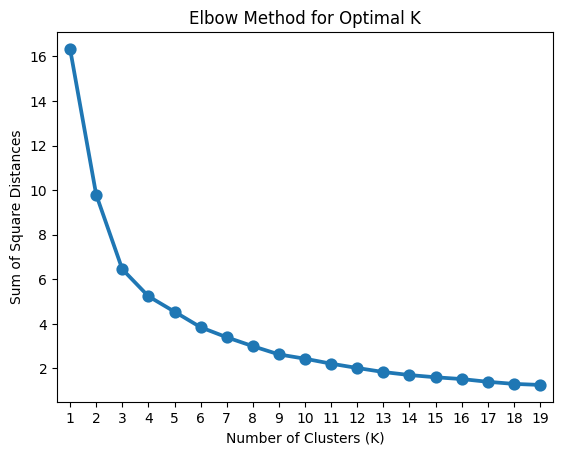

In [11]:
# Importamos las librerias necesarias para la visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Generamos un gráfico de puntos para visualizar la suma de las distancias cuadradas para cada valor de k.
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))

# Etiquetamos el eje x como "Número de Clusters (K)".
plt.xlabel("Number of Clusters (K)")

# Etiquetamos el eje y como "Suma de Distancias Cuadradas".
plt.ylabel("Sum of Square Distances")

# Añadimos un título al gráfico como "Método del Codo para K Óptimo".
plt.title("Elbow Method for Optimal K")

# Mostramos el gráfico generado.
plt.show()

In [12]:
df_i.head()

,Salud,Comercio,Finanzas
0,0.625740,0.139614,0.079820
1,0.127451,0.199901,0.088756
2,0.182485,0.186622,0.212808
3,0.661381,0.283058,0.236946
4,0.116409,0.275189,0.145043


In [13]:
# Creamos y entrenamos un modelo KMeans con 3 clusters.
Model = KMeans(n_clusters=3, # Establecemos el número de clusters en 3.
             init='k-means++', # Usamos el método de inicialización 'k-means++'.
             max_iter=1000, # Establecemos el número máximo de iteraciones en 1000.
               random_state=42) # Fijamos la semilla aleatoria para la reproducibilidad.
Model.fit(df_i) # Ajustamos el modelo a nuestros datos.

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [14]:
# Obtenemos las etiquetas de los clusters asignados a cada punto de datos.
labels = Model.labels_

# Calculamos el Silhouette Score para evaluar la calidad de los clusters.
silhouette_score(df_i, labels)

0.4519707671437545

In [15]:
# Obtenemos las coordenadas de los centroides de los clusters.
centroids = Model.cluster_centers_

In [16]:
# Creamos una copia del DataFrame df_i y la llamamos df_i_cl.
df_i_cl = df_i.copy()
# Agregamos una nueva columna llamada "Cluster" al DataFrame df_i_cl
# que contiene las etiquetas de los clústeres predichas por el modelo KMeans.
df_i_cl["Cluster"] = Model.fit_predict(df_i)
# Mostramos las primeras filas del DataFrame df_i_cl para verificar los resultados.
df_i_cl.head()

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Salud,Comercio,Finanzas,Cluster
0,0.625740,0.139614,0.079820,0
1,0.127451,0.199901,0.088756,1
2,0.182485,0.186622,0.212808,1
3,0.661381,0.283058,0.236946,0
4,0.116409,0.275189,0.145043,1


In [17]:
# Importamos las librerias necesarias para la visualización
import plotly.graph_objs as go
import plotly as py


# Creamos una copia del DataFrame df_i y la llamamos df_c.
df_c = df_i.copy()
# Agregamos una nueva columna llamada 'labels' al DataFrame df_c
# que contiene las etiquetas de los clústeres predichas por el modelo KMeans.
df_c['labels'] = labels

# Creamos un gráfico de dispersión 3D utilizando Plotly.
trace = go.Scatter3d(
                    x = df_c['Salud'], # Establecemos la columna 'Salud' como el eje x.
                    y = df_c['Comercio'], # Establecemos la columna 'Comercio' como el eje y.
                    z = df_c['Finanzas'], # Establecemos la columna 'Finanzas' como el eje z.
                    mode = 'markers', # Usamos marcadores para representar los puntos de datos.
                    marker=dict(color=df_c['labels'], size = 5, line=dict(color=df_c['labels'], width=12), opacity=0.8) # Personalizamos el aspecto de los marcadores.
                    )

# Creamos una lista de datos para el gráfico.
data = [trace]
# Creamos el diseño del gráfico.
layout = go.Layout(
                    title='Clusters', # Establecemos el título del gráfico.
                    scene= dict(
                                xaxis = dict(title = 'Age'), # Etiquetamos el eje x como 'Age'.
                                yaxis = dict(title = 'Annual Income (k$)'), # Etiquetamos el eje y como 'Annual Income (k$)'.
                                zaxis = dict(title = 'Spending Score (1-100)')) # Etiquetamos el eje z como 'Spending Score (1-100)'.
                                )

# Creamos la figura del gráfico.
fig = go.Figure(data=data, layout=layout)
# Mostramos el gráfico
fig.show()

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

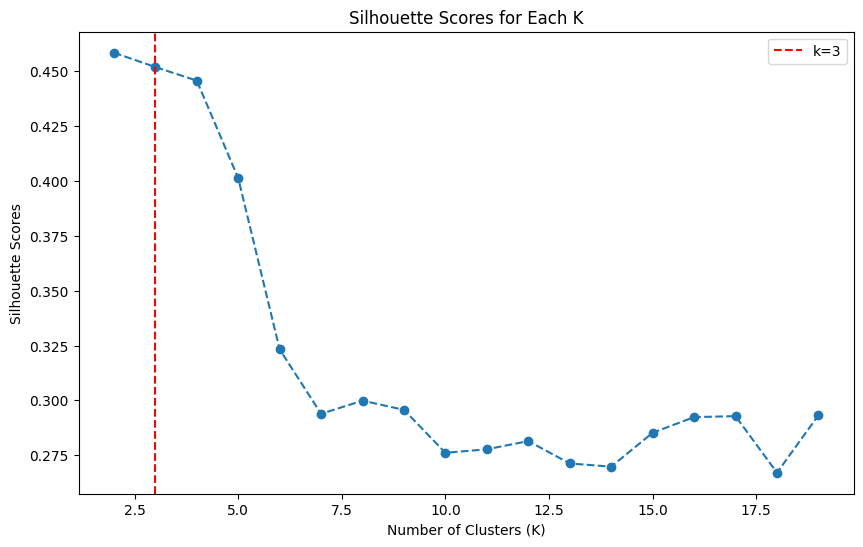

In [18]:
# Creamos un diccionario para almacenar las puntuaciones de Silhouette para cada valor de k.
silhouette = {}

# Iteramos a través de un rango de valores para k (número de clusters).
for k in range(2, 20):
    # Inicializamos el modelo KMeans con k clusters, inicialización 'k-means++', un máximo de 1000 iteraciones y una semilla aleatoria.
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)

    # Ajustamos el modelo KMeans a nuestros datos (df_i).
    km.fit(df_i)

    # Calculamos y almacenamos la puntuación de Silhouette para el valor actual de k.
    silhouette[k] = silhouette_score(df_i, km.labels_)

# Graficamos las puntuaciones de Silhouette.
plt.figure(figsize=(10, 6)) # Creamos una figura y establecemos su tamaño.
plt.plot(list(silhouette.keys()), list(silhouette.values()), marker="o", linestyle="--") # Creamos un gráfico de línea con marcadores.

# Añadimos etiquetas a los ejes y un título al gráfico.
plt.xlabel("Number of Clusters (K)") # Etiqueta del eje x.
plt.ylabel("Silhouette Scores") # Etiqueta del eje y.
plt.title("Silhouette Scores for Each K") # Título del gráfico.

# Agregamos una línea vertical punteada en el valor k=3.
k_value = 3
plt.axvline(x=k_value, color='r', linestyle='--', label=f'k={k_value}')

# Mostramos la leyenda y el gráfico.
plt.legend()
plt.show()

In [19]:
def calculate_gap_statistic(data, refs=None, n_refs=10, max_k=10):
    """
    Calculamos el Gap Statistic para el rango de clusters K = [1, max_k].

    Parámetros:
    - data: array numpy de los datos (normalizados)
    - refs: datos de referencia generados aleatoriamente (si es None, se generan internamente)
    - n_refs: número de conjuntos de referencia
    - max_k: máximo número de clusters a evaluar

    Devuelve:
    - gaps: lista con los valores Gap Statistic para cada valor de K
    - deviations: desviaciones estándar de las simulaciones
    """
    # Si no se proporcionan datos de referencia, los generamos aleatoriamente.
    if refs is None:
        refs = np.random.uniform(low=np.min(data, axis=0), high=np.max(data, axis=0), size=(data.shape[0] * n_refs, data.shape[1]))

    # Inicializamos listas para almacenar los valores del Gap Statistic y las desviaciones estándar.
    gaps = []
    deviations = []

    # Iteramos a través de un rango de valores para k (número de clusters).
    for k in range(1, max_k + 1):
        # Ajustamos el modelo KMeans a los datos reales y calculamos la dispersión.
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        disp_real = np.mean(np.min(pairwise_distances(data, kmeans.cluster_centers_), axis=1))

        # Ajustamos el modelo KMeans a los datos aleatorios y calculamos la dispersión.
        disp_refs = []
        for i in range(n_refs):
            ref_subset = refs[i * data.shape[0]:(i + 1) * data.shape[0], :]
            kmeans.fit(ref_subset)
            disp_refs.append(np.mean(np.min(pairwise_distances(ref_subset, kmeans.cluster_centers_), axis=1)))

        # Calculamos el Gap Statistic y la desviación estándar.
        gap = np.log(np.mean(disp_refs)) - np.log(disp_real)
        sd_k = np.sqrt(np.mean((np.log(disp_refs) - np.log(np.mean(disp_refs))) ** 2))
        sk = sd_k * np.sqrt(1 + 1 / n_refs)  # Ajustamos por el número de referencias

        # Agregamos los resultados a las listas.
        gaps.append(gap)
        deviations.append(sk)

    # Devolvemos los valores del Gap Statistic y las desviaciones estándar como arrays numpy.
    return np.array(gaps), np.array(deviations)

In [20]:
# Definimos el número de conjuntos de referencia para el Gap Statistic.
n_refs = 50
# Definimos el número máximo de clusters a evaluar con el Gap Statistic.
max_k = 15

In [21]:
# Calculamos el Gap Statistic y las desviaciones estándar para diferentes números de clusters.
gaps, deviations = calculate_gap_statistic(df_i, n_refs=n_refs, max_k=max_k)

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\iraze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

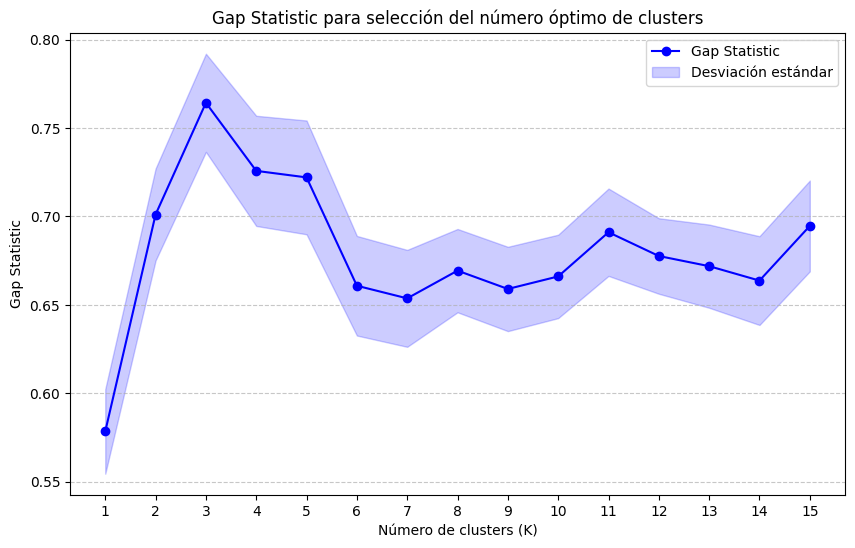

In [ ]:
# Creamos un array con los valores de k (número de clusters) a evaluar.
ks = np.arange(1, max_k + 1)
# Creamos una figura para el gráfico y establecemos su tamaño.
plt.figure(figsize=(10, 6))
# Graficamos el Gap Statistic.
plt.plot(ks, gaps, marker='o', linestyle='-', color='blue', label='Gap Statistic')
# Agregamos un área sombreada para representar la desviación estándar.
plt.fill_between(ks, gaps - deviations, gaps + deviations, color='blue', alpha=0.2, label='Desviación estándar')
# Añadimos un título al gráfico.
plt.title('Gap Statistic para selección del número óptimo de clusters')
# Etiquetamos los ejes x e y.
plt.xlabel('Número de clusters (K)')
plt.ylabel('Gap Statistic')
# Establecemos las marcas en el eje x.
plt.xticks(ks)
# Mostramos la leyenda.
plt.legend()
# Agregamos una cuadrícula al gráfico.
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostramos el gráfico.
plt.show()

Como bien nos enseña el método del codo, el mayor salto de varianza ocurre entre el primer y el segundo valor para K, a partir de este siguen habiendo pero son menores, por lo tanto esto ya nos anima a usar K= 3, además si comprobamos las siluetas para distintos valores de K, observamos que efectivamente alcanza un gran valor en este punto, y por último, pata terminar de convencernos en usar K=3, el Gap Statistic, tiene el máximo en ese valor.

## 5 Análisis de resultados y conclusión del problema.

En esta sección final, se interpretan los resultados del clustering en el contexto del problema original de la ONG, se visualizan geográficamente y se extraen conclusiones accionables.

*   **Análisis de Clústeres por Variables de Interés**: Siguiendo las directrices de la ONG, se analizaron los clústeres en función de las dos variables más representativas: el ingreso neto (`income`) y la mortalidad infantil (`child_mort`). Se generaron diagramas de caja (boxplots) para cada variable, comparando sus distribuciones a través de los tres clústeres identificados. Este análisis permitió caracterizar cada grupo y asignarles un nivel de necesidad de ayuda: "No necesita ayuda", "Necesita ayuda moderada" y "Necesita ayuda urgente".

*   **Visualización Geográfica de los Niveles de Ayuda**: Para comunicar los resultados de manera efectiva, se utilizó la librería `plotly.express` para crear un mapa coroplético mundial. En este mapa, cada país se coloreó según el nivel de ayuda asignado a su clúster, permitiendo una identificación visual rápida de las regiones con mayor vulnerabilidad.

*   **Conclusiones y Recomendaciones**: El análisis concluye con una recomendación clara sobre qué países debería priorizar "Ayuda Internacional" para la asignación de sus recursos, basándose en la caracterización de los clústeres. Además, se proponen posibles mejoras y siguientes pasos que podrían refinar este análisis en el futuro, como la exploración de otros algoritmos de clustering o la inclusión de variables adicionales.

C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\353672380.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\iraze\AppData\Local\Temp\ipykernel_14036\353672380.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




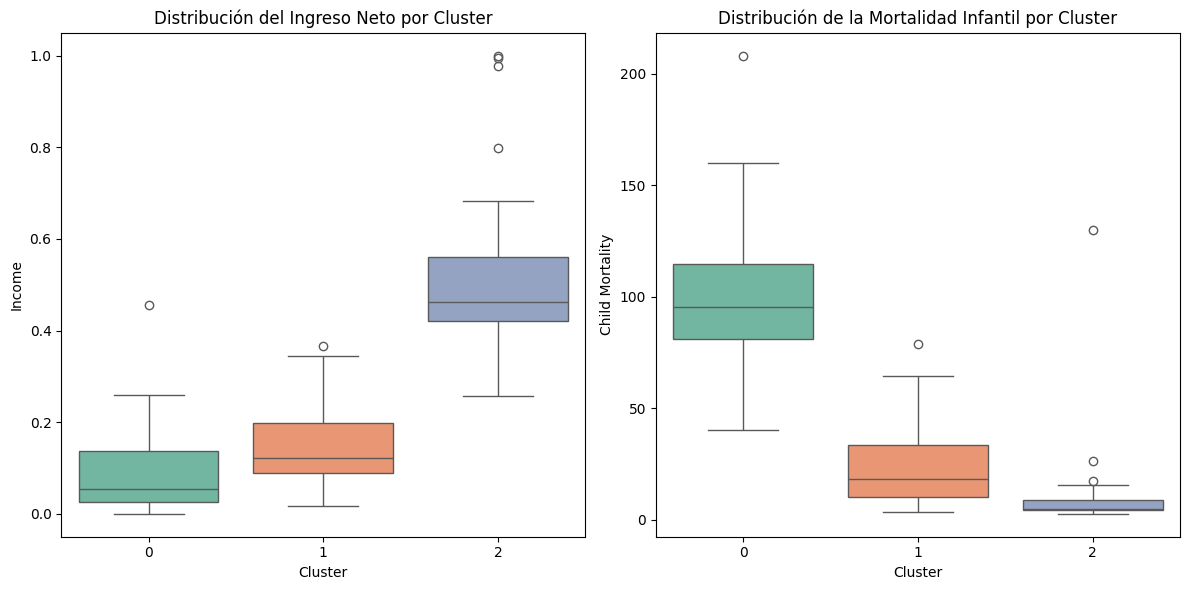

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una figura que contendrá dos subgráficos (boxplots) y ajustamos su tamaño.
plt.figure(figsize=(12, 6))

# Creamos el primer subgráfico (boxplot para Income) y lo colocamos en la primera posición de una cuadrícula de 1 fila y 2 columnas.
plt.subplot(1, 2, 1)
# Generamos el boxplot utilizando seaborn, donde el eje x representa los clusters y el eje y representa el Ingreso Neto.
sns.boxplot(x=df_i_cl['Cluster'], y=df_i['Finanzas'], palette="Set2")
# Etiquetamos el eje x como "Cluster".
plt.xlabel("Cluster")
# Etiquetamos el eje y como "Income".
plt.ylabel("Income")
# Añadimos un título al subgráfico: "Distribución del Ingreso Neto por Cluster".
plt.title("Distribución del Ingreso Neto por Cluster")

# Creamos el segundo subgráfico (boxplot para Child Mortality) y lo colocamos en la segunda posición de la cuadrícula.
plt.subplot(1, 2, 2)
# Generamos el boxplot utilizando seaborn, donde el eje x representa los clusters y el eje y representa la Mortalidad Infantil.
sns.boxplot(x=df_i_cl['Cluster'], y=df['child_mort'], palette="Set2")
# Etiquetamos el eje x como "Cluster".
plt.xlabel("Cluster")
# Etiquetamos el eje y como "Child Mortality".
plt.ylabel("Child Mortality")
# Añadimos un título al subgráfico: "Distribución de la Mortalidad Infantil por Cluster".
plt.title("Distribución de la Mortalidad Infantil por Cluster")

# Ajustamos el espacio entre los subgráficos para evitar superposiciones.
plt.tight_layout()
# Mostramos la figura con los dos subgráficos (boxplots).
plt.show()

Ingreso neto:


*   Cluster 0: Tiene la mediana muy baja, y la mayoria de los ingresos (RIC) son también muy bajos, y prácticamente con ningún valor excepcionalmente alto


*   Cluster 1:
Tiene en general los ingresos mas altos y además hay bastantes valores atípicos con ingresos muy altos

*  Cluster 2:
Es sin ninguna duda la el que tiene los menores ingresos.


Mortalidad Infantil:


*   Cluster 0: Tiene por lo general una mortalidad infantil bastante baja y algun valor atípico pero no muy lejano.


*   Cluster 1:
Tiene sin duda la menor mortalidad infantil aunque se encuentra con algunos valores muy atípicos.

*  Cluster 2:
Es el que tiene mayor mortalidad infantil con diferencia y también posee valores atípicos con mortalidad infantil super alto


Tras ver esto, clasificaria el cluster 2 como el nivel 2 necesita mucha ayuda, cluster 0 como el nivel 1 necesita ayuda y el cluster 1 como 0 no necesita ayuda

In [36]:
import plotly.express as px

# Copiamos el DataFrame y asignamos los países
df1 = df_i_cl.copy()
df1['country'] = df['country']
# Reasignamos las etiquetas de los clusters (esto está bien)
# ... (código anterior igual) ...

# Reasignamos las etiquetas para que 2 sea el valor más bajo (azul) y 0 el más alto (amarillo)
df1['Cluster'] = df1['Cluster'].replace({0: 2, 1: 1, 2: 0})

# Creamos el mapa con la escala de colores Plasma (sin invertir).
fig = px.choropleth(df1,
                    locations="country",
                    locationmode="country names",
                    color="Cluster",
                    color_continuous_scale="Plasma",
                    title="Mapa Mundial: Nivel de Ayuda Necesario por País",
                    labels={"Cluster": "Nivel de Ayuda"})

# ... (resto del código igual) ...

# Mejoramos el diseño del mapa.
fig.update_layout(
    geo=dict(showcoastlines=True, showland=True, landcolor="rgb(217, 217, 217)"),
    paper_bgcolor="white",
    geo_bgcolor="rgba(0,0,0,0)"
)

# Mostramos el mapa
fig.show()




Por lo tanto podemos observar que los paises que mas ayuda necesitan son los ubicados en África central, Junto con Alghanistan y con Pakistan, lo cual se ajusta a la realidad, los siguientes que necesitan ayuda son los de Sudamérica, los exteriores de África y una Gran parte de Asia. Finalmente los paises que menos ayuda necesitan son los paises de Norteamérica, Europa central y del Noroeste,  Australia, y algunas otras excepciones.

Para tratar de mejorar el modelo podríamos intentar usar mas variables en vez de solo 3, sin embargo perderíamos la interpretabilidad de poder graficar los clusters, aunque vale la pena intentarlo.

,Salud,Comercio,Finanzas,Cluster,country
0,0.625740,0.139614,0.079820,2,Afghanistan
1,0.127451,0.199901,0.088756,0,Albania
2,0.182485,0.186622,0.212808,0,Algeria
3,0.661381,0.283058,0.236946,2,Angola
4,0.116409,0.275189,0.145043,0,Antigua and Barbuda
...,...,...,...,...,...
162,0.217274,0.262886,0.035009,0,Vanuatu
163,0.133337,0.124193,0.559740,1,Venezuela
164,0.170070,0.403386,0.121436,0,Vietnam
165,0.397451,0.170248,0.229632,0,Yemen
